# MGUA Implementation with Incremental Feature Evaluation

## 1. Load and Preprocess Data

In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
import matplotlib.pyplot as plt

# Load datasets
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Split features and target variable
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values


## 2. MGUA Implementation with Incremental Feature Evaluation

In [2]:

# Function to evaluate the model incrementally with additional features
def incremental_feature_evaluation(X_train, y_train, X_test, y_test):
    n_features = X_train.shape[1]
    results = []

    for i in range(1, n_features + 1):
        combination = tuple(range(i))  # Incrementally use more features
        X_train_subset = X_train[:, combination]
        X_test_subset = X_test[:, combination]
        
        # Train and evaluate the model
        model = LinearRegression()
        model.fit(X_train_subset, y_train)
        train_pred = model.predict(X_train_subset)
        val_pred = model.predict(X_test_subset)
        
        # Calculate training and validation losses
        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_test, val_pred)
        
        results.append({
            "Number of Features": i,
            "Features Used": combination,
            "Training MSE": train_mse,
            "Validation MSE": val_mse
        })
    
    return pd.DataFrame(results)

# Perform incremental feature evaluation
incremental_results = incremental_feature_evaluation(X_train, y_train, X_test, y_test)
incremental_results


,Number of Features,Features Used,Training MSE,Validation MSE
0,1,"(0,)",0.064724,0.065586
1,2,"(0, 1)",0.064520,0.065332
2,3,"(0, 1, 2)",0.064094,0.064837
3,4,"(0, 1, 2, 3)",0.043989,0.044485
4,5,"(0, 1, 2, 3, 4)",0.040028,0.040561
5,6,"(0, 1, 2, 3, 4, 5)",0.036941,0.037202
6,7,"(0, 1, 2, 3, 4, 5, 6)",0.036818,0.037082
7,8,"(0, 1, 2, 3, 4, 5, 6, 7)",0.036675,0.036918
8,9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.036675,0.036918
9,10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",0.036675,0.036918


## 3. Visualization of Incremental Results

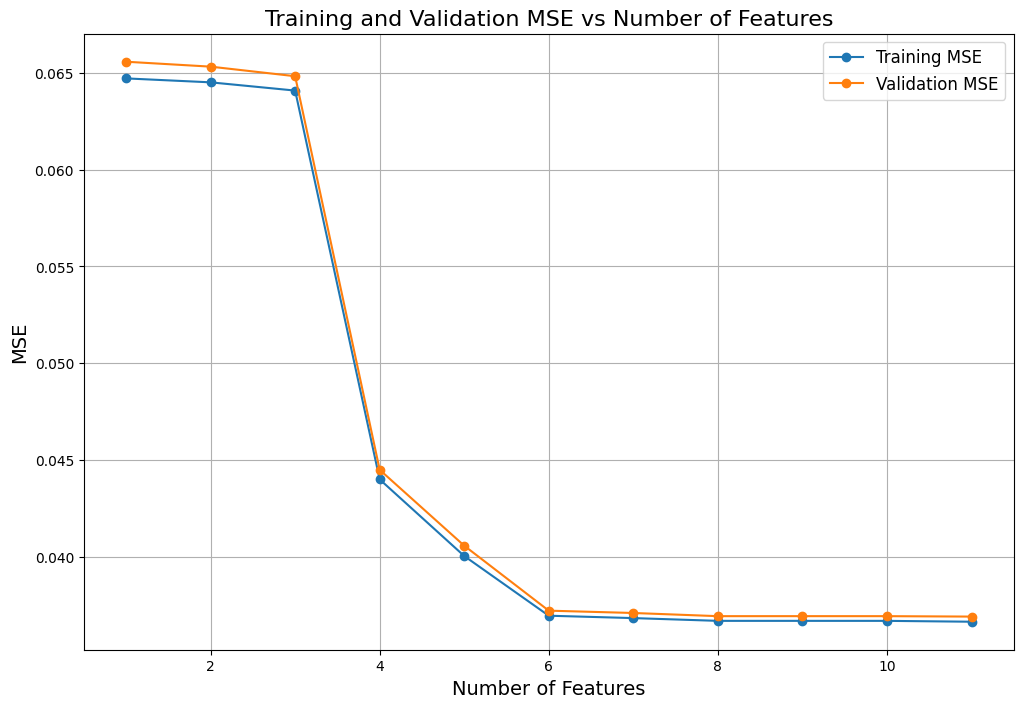

In [3]:

# Plot the Training and Validation MSE for incremental feature evaluation
plt.figure(figsize=(12, 8))
plt.plot(incremental_results["Number of Features"], incremental_results["Training MSE"], label="Training MSE", marker="o", color="tab:blue")
plt.plot(incremental_results["Number of Features"], incremental_results["Validation MSE"], label="Validation MSE", marker="o", color="tab:orange")
plt.title("Training and Validation MSE vs Number of Features", fontsize=16)
plt.xlabel("Number of Features", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


## 4. Actual vs Predicted Power for the Best Feature Set

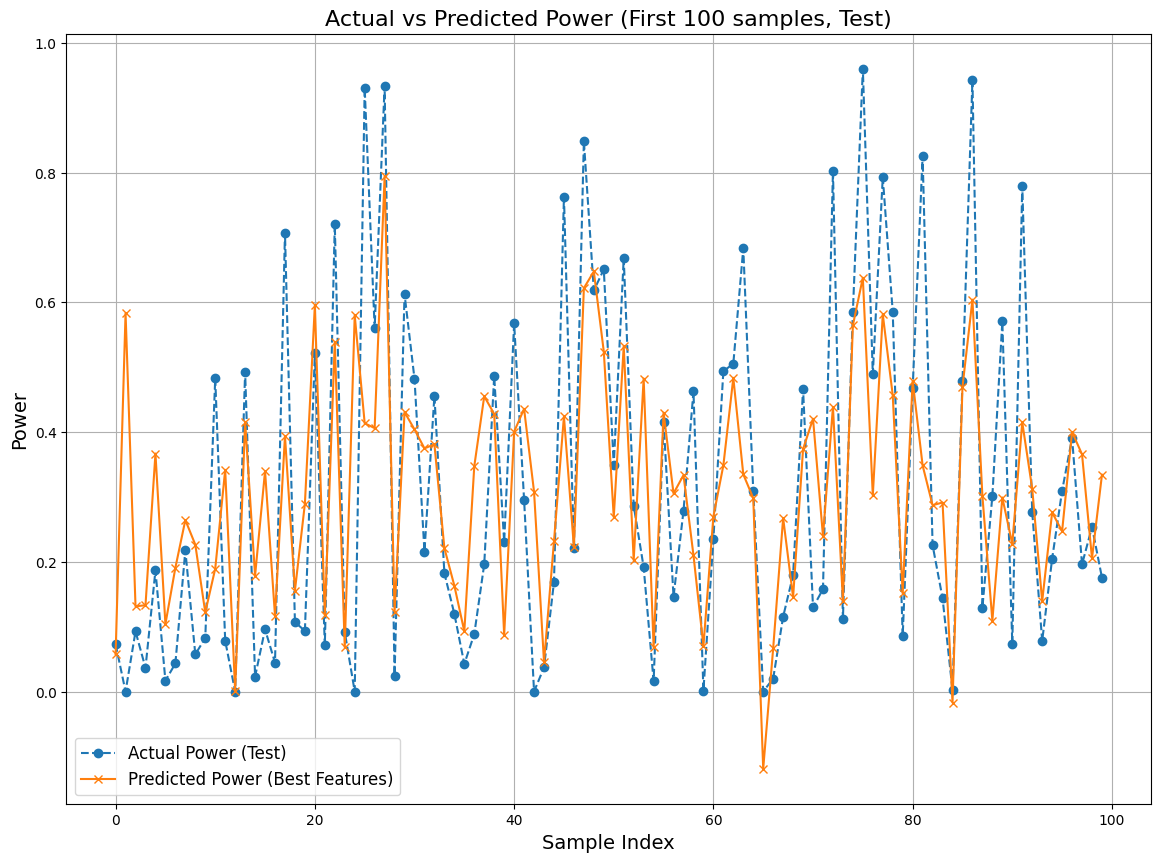

In [4]:

# Use the best feature set (all features in this case)
best_combination = tuple(range(X_train.shape[1]))
X_test_best = X_test[:, best_combination]

# Train the model on the full feature set
model = LinearRegression()
model.fit(X_train[:, best_combination], y_train)

# Generate predictions for the first 100 samples
actual_power = y_test[:100]
predicted_power = model.predict(X_test_best[:100])

# Plot Actual vs Predicted Power
plt.figure(figsize=(14, 10))
plt.plot(actual_power, label="Actual Power (Test)", linestyle="--", marker="o", color="tab:blue")
plt.plot(predicted_power, label="Predicted Power (Best Features)", linestyle="-", marker="x", color="tab:orange")
plt.title("Actual vs Predicted Power (First 100 samples, Test)", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
